<center><img src="img/Colorado_School_of_Mines.png" style="width: 480px; height: 80px;"></center>

<div style="text-align: center; font-weight: bold; font-size: 28px">QUANTITATIVE ASSIGNMENT</div>

<div style="text-align: center; font-size: 24px">Interplanetary Transportation System</div>
<div style="text-align: center; font-size: 24px">Space Resources Fundamentals I (Winter 2022)</div>
<br>
<div style="text-align: right; font-size: 16px">Attila Nemet</div>
<br>

<center><img src="img/SpaceStations.png" ></center>

Transportation of material around the solar system (particularly propellant) from
where materials can be found to the destinations where they will be needed and utilized
is an important component of the future space economy. 

In this assignment we are going to 
evaluate four types of rocket propelled tankers delivering propellant to the Earth-Moon
Lagrange Point 1 (EML1) from several locations with potential resource deposits.

Table 1 lists the specific impulse, dry mass (mass of the tanker without payload
and without propellant), and maximum propellant mass for four types of rocket powered
space tankers. For simplicity in this analysis, the tanker payload is the propellant stored
in the rocket engine tanks. The tankers transport propellant to their destination with the
delivered propellant in the tanks: for instance, a tanker is filled with 50 metric tons (mT)
of propellant at the resource location and uses 30 mT to move to EML1, thus 20 mT of
propellant has been delivered to LM1. The maximum propellant capacity is the same for
all the tankers. Two common rocket propellants are listed: Liquid Oxygen (LO2)/Liquid
Hydrogen (LH2) and Liquid Oxygen (LO2)/Methane (CH4). Two types of solar thermal
propulsion (STP) rocket engines are listed: one with a low Isp (250s) and another with a
high Isp (500s).

**Objective:** We are going to evaluate the suitability of each space tanker for in-space transportation of
propellant.

**Table 1.**

| Rocket Engine | Isp [s] | Dry Mass [mT] | Max Propellant Mass [mT] |
|---------------|:-------:|:-------------:|:------------------------:|
| LO2/LH2       |   450   |      3        |          50              |
| LO2/CH4       |   312   |      6        |          50              |
| STP (low Isp) |   250   |      6        |          50              |
| STP (high Isp)|   500   |     12        |          50              |

*Note: These specifications are only approximate values for these rocket types. STP propellant is
assumed to be any gas that can be produced from available space resources.*

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});


<IPython.core.display.Javascript object>

### a) What is the maximum Delta-V achievable with the space tanker rocket engines listed in Table 1? 
#### Hint: use the rocket equation.

#### The Rocket Equation

\begin{equation*}
\Delta v = v_e ln \left(\frac{m_i}{m_f} \right)
\label{eq:rocket_equation} \tag{1}
\end{equation*}

where:

* $\Delta v$ = change in velocity of the rocket [m/s]
* $v_e$ = exit velocity of the rocket engine [m/s]
* $I_{sp}$ = specific impulse = thrust/flowrate = efficiency of a rocket engine [s]
* $v_e = gI_{sp}$ [m/s]
* $m_i$ = initial mass [kg]
* $m_f$ = final mass [kg]
* $g$ = 9.81 m/s<sup>2</sup>

In our case $m_i = m_{dry} + m_{max.prop}$ and $m_f = m_{dry}$ so the equation can be written as:

$$
\Delta v = gI_{sp} ln \left(\frac{m_{dry}+m_{max.prop}}{m_{dry}} \right)
$$

This is the original Table:

In [2]:
%matplotlib inline
import pandas as pd
from numpy import log, e

In [3]:
df = pd.read_excel('SpaceTransport.xlsx')
df

,Rocket Engine,Isp [s],Dry Mass [mT],Max Prop. Mass [mT]
0,LO2/LH2,450,3,50
1,LO2/CH4,312,6,50
2,STP (low Isp),250,6,50
3,STP (high Isp),500,12,50


Applying the equation to our table we will get the following values for "Max Δv [km/s]":

In [4]:
g = 9.81 # [m/s²]
df['Max Δv [km/s]'] = round((g * df['Isp [s]'] * log((df['Dry Mass [mT]'] + 
                      df['Max Prop. Mass [mT]'])/df['Dry Mass [mT]']) )/1000, 1)
df

,Rocket Engine,Isp [s],Dry Mass [mT],Max Prop. Mass [mT],Max Δv [km/s]
0,LO2/LH2,450,3,50,12.7
1,LO2/CH4,312,6,50,6.8
2,STP (low Isp),250,6,50,5.5
3,STP (high Isp),500,12,50,8.1


We can see that LO<sub>2</sub>/LH<sub>2</sub> max Δv is almost double of all other rocket types - this is because of the combination of high Isp and low Dry Mass.

### b) How much propellant can be delivered by each space tanker for a Delta-V of 2 km/s?
#### Assume the tanker is fully fueled at the start of the 2 km/s Delta-V maneuver.

We are going to slightly rearrange the rocket equation.

$$
\Delta v = v_e ln \left(\frac{m_i}{m_f} \right)
$$


$$
\frac{\Delta v}{v_e} = ln \left( \frac{m_i}{m_f} \right)
$$

$$
\frac{m_i}{m_f} = e^{\frac{\Delta v}{v_e}}
$$

We'd like to know what will be the $m_f$:

$$
m_f = \frac{m_i}{e^{\frac{\Delta v}{v_e}}} = m_i e^{- \frac{\Delta v}{v_e}}
$$

Considering again $v_e = gI_{sp}$ and $m_i = m_{dry} + m_{max.prop}$ and $m_f = m_{dry} + m_{prop.deliv}$

$$
m_{dry} + m_{prop.deliv} = (m_{dry} + m_{max.prop})  ·  e^{-\frac{\Delta v}{gI_{sp}}}
$$



\begin{equation*}
m_{prop.deliv} = (m_{dry} + m_{max.prop})  ·  e^{-\frac{\Delta v}{gI_{sp}}} - m_{dry} 
\label{eq:prop_eq} \tag{2}
\end{equation*}

Applying the equation to our table we will get the results in the column "Prop Deliv [mT]".

In [5]:
Δv = 2000 # [m/s]
df['Prop Deliv [mT]'] = round((df['Dry Mass [mT]'] + df['Max Prop. Mass [mT]']
                       ) * e**(-Δv / g / df['Isp [s]']) - df['Dry Mass [mT]'], 1)
df

,Rocket Engine,Isp [s],Dry Mass [mT],Max Prop. Mass [mT],Max Δv [km/s],Prop Deliv [mT]
0,LO2/LH2,450,3,50,12.7,30.7
1,LO2/CH4,312,6,50,6.8,23.1
2,STP (low Isp),250,6,50,5.5,18.8
3,STP (high Isp),500,12,50,8.1,29.2


This time the LO<sub>2</sub>/LH<sub>2</sub> and the STP (high Isp) are the best performers, both can deliver around ~30 mT fuel, while the other two rockets deliver only around ~20 mT.

### c) Solve for the propellant delivered by each space tanker for Delta-Vs from 1 km/s to 8 km/s in increments of ≤1 km/s (i.e. 1, 2, 3 km/s, etc... or finer). Present the result in a table or a graph.
#### Answer these specific questions:
1. Are some space tankers clearly superior?
2. Are some space tankers not suitable for certain values of Delta-V?

Since this is an expansion of the previous question we don't need to prepare a new formula, but we are going to code a new table:

In [6]:
all_fuel = []
for Δv in range(0,8001,100):
    fuel_delivered =  round((df['Dry Mass [mT]'] + df['Max Prop. Mass [mT]']
                       )/e**(Δv / g / df['Isp [s]']) - df['Dry Mass [mT]'], 1)
    all_fuel.append([Δv/1000] + list(fuel_delivered))

df1 = pd.DataFrame(all_fuel, columns = ['Δv [km/s]'] + list(df['Rocket Engine']))
df1.head()

,Δv [km/s],LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
0,0.0,50.0,50.0,50.0,50.0
1,0.1,48.8,48.2,47.8,48.7
2,0.2,47.7,46.5,45.6,47.5
3,0.3,46.5,44.8,43.6,46.3
4,0.4,45.4,43.1,41.6,45.1


The beginning of the new table looks promising, now let's have a look on the higher Δv-s:

In [7]:
df1.tail()

,Δv [km/s],LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
76,7.6,6.5,-1.3,-3.5,1.2
77,7.7,6.3,-1.5,-3.6,0.9
78,7.8,6.1,-1.6,-3.7,0.6
79,7.9,5.9,-1.8,-3.8,0.4
80,8.0,5.7,-1.9,-3.9,0.1


It looks like some of the rockets are going to deliver negative amount of propellant at high Δv-s, this can't happen in the real world, so we're going to fix that by setting the negative values to 0.

In [8]:
df1[df1 < 0] = 0

Now let's plot how are performing our rockets:

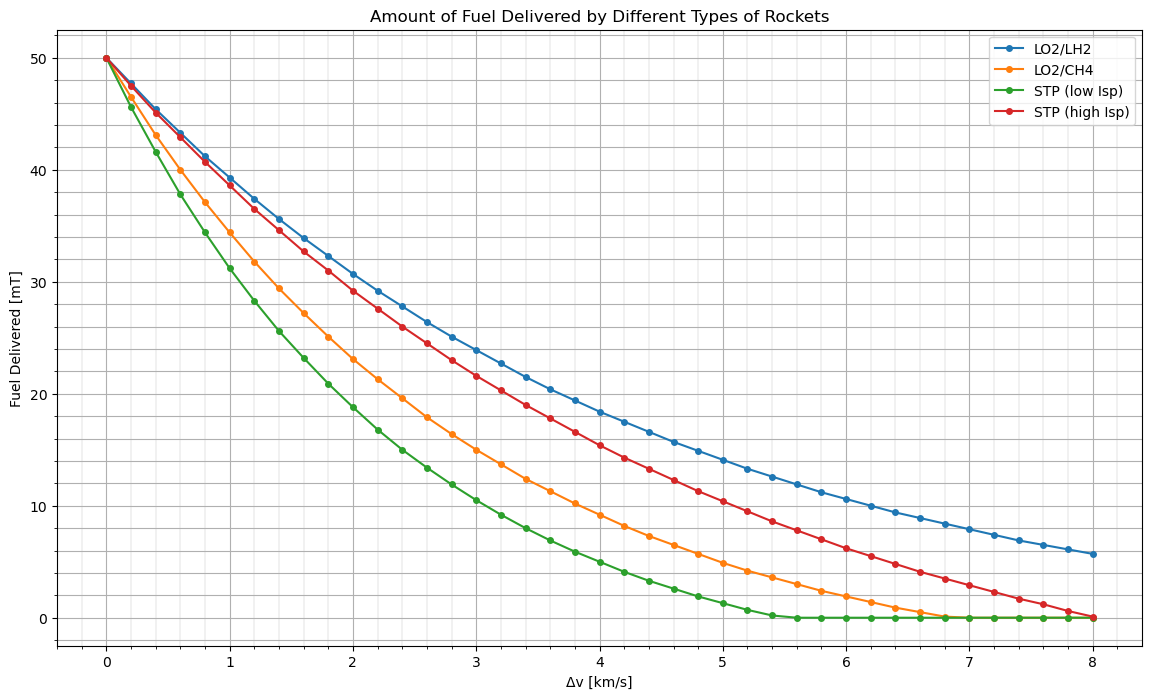

In [9]:
ax = df1.iloc[::2].plot.line(x="Δv [km/s]", y=["LO2/LH2","LO2/CH4", "STP (low Isp)", "STP (high Isp)"], grid=True,  marker='.', figsize=(14,8), markersize=8, 
                   title='Amount of Fuel Delivered by Different Types of Rockets')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('Fuel Delivered [mT]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

**c) 1.Are some space tankers clearly superior?**

The LO2/LH2 is leading the race all the way. The STP rockets might be built in the future, so I'm not going to speculate about them, but I was quite surprised about the huge difference between the LO2/LH2 propulsion vs the LO2/CH4 propulsion. This was especially surprising because I knew that SLS and the upcoming Long March 9 is using LO2/LH2 while the Starship is using LO2/CH4. So, I started to think, that maybe Elon Musk made a mistake choosing the methane over the hydrogen? Of course, the methane has some advantages as well, like easier to handle, less cooling needed, might be easier to produce on Mars for a return trip, but still, LO2/LH2 looks much more efficient in this graph.

After careful examination I've discovered a significant difference between the LO2/LH2 and LO2/CH4 rockets - their dry mass. In our example the LO2/LH2 has a dry mass of 3 tone while the LO2/CH4 has a dry mass of 6 tone. Now that's quite significant, and I'm not aware of any reason why these otherwise very similar rockets should have this weight difference. Maybe because Starship is using steel while the others are using carbon fiber? Or maybe this data has no connection to the real world? After all the SLS and Starship are much bigger rockets, their total mass is in the thousands of metric tone region. Anyway, I took the liberty to "build" a lightweight LO2/CH4 rocket (dry mass = 3 mT) and inserted it in the datasheet to have an apple-to-apple comparison.  Let’s have a look what happens.


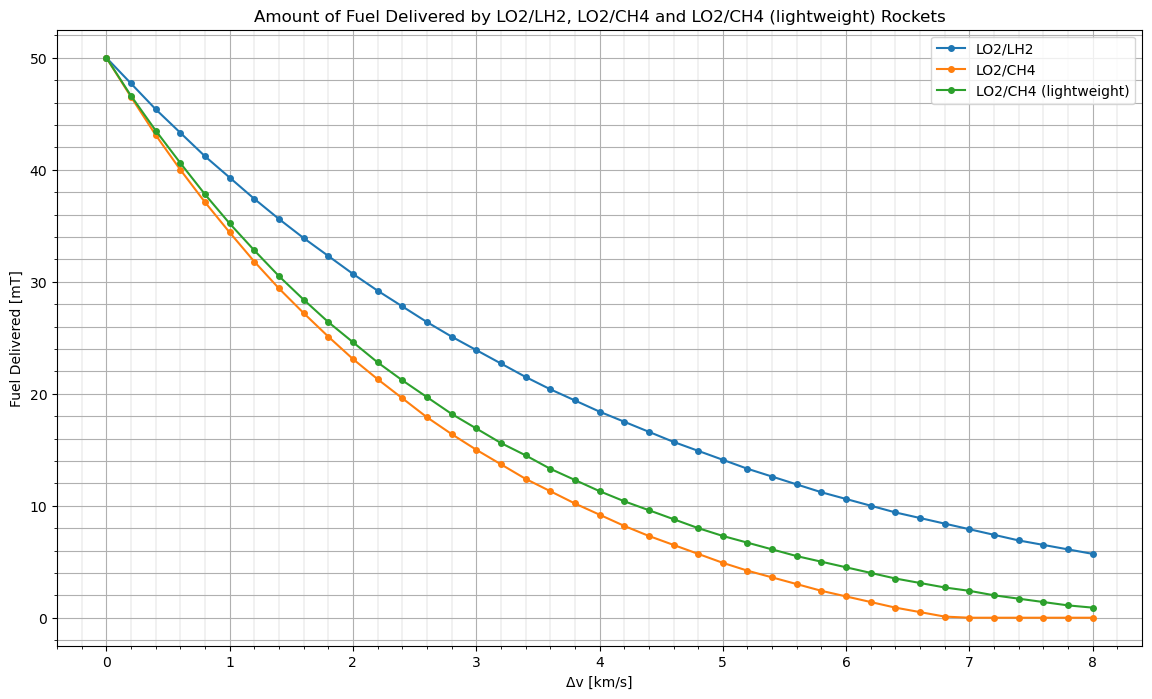

In [10]:
df2 = pd.read_excel('SpaceTransport1.xlsx')
all_fuel = []
for Δv in range(0,8001,100):
    fuel_delivered =  round((df2['Dry Mass [mT]'] + df2['Max Prop. Mass [mT]']
                       )/e**(Δv / g / df2['Isp [s]']) - df2['Dry Mass [mT]'], 1)
    all_fuel.append([Δv/1000] + list(fuel_delivered))

df3 = pd.DataFrame(all_fuel, columns = ['Δv [km/s]'] + list(df2['Rocket Engine']))
df3[df3 < 0] = 0
ax = df3.iloc[::2].plot.line(x="Δv [km/s]", y=["LO2/LH2","LO2/CH4","LO2/CH4 (lightweight)"], grid=True,  marker='.', figsize=(14,8), markersize=8, 
                   title='Amount of Fuel Delivered by LO2/LH2, LO2/CH4 and LO2/CH4 (lightweight) Rockets')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('Fuel Delivered [mT]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

Ok, the LO2/LH2 rocket is performing still way better. Since the LO2/LH2 Isp is 450 vs the LO2/CH4 Isp of 312 this shows up in the delivered payload. So, I guess the Starship choose CH4 over LH2 because of easy handling, logistics and probably price. While there is a difference between efficiency of the original and the lightweight LO2/CH4 rockets (aka "carbon fiber" or "steel" structure), that is acceptable, so Starship choose again the usability over the latest high-tech.

Meanwhile I've discovered a Tweet by Mr Musk where he's stating that the Starship's [Raptor engine will have ~380 Isp](https://twitter.com/elonmusk/status/1171118891671490560) with larger vacuum-optimized nozzle (instead of the 312 given here).  Now let's try to equip our LO2/CH4 (lightweight) rocket with this Raptor engine and let's make again a comparison against the LO2/LH2 and the "original" LO2/CH4. 

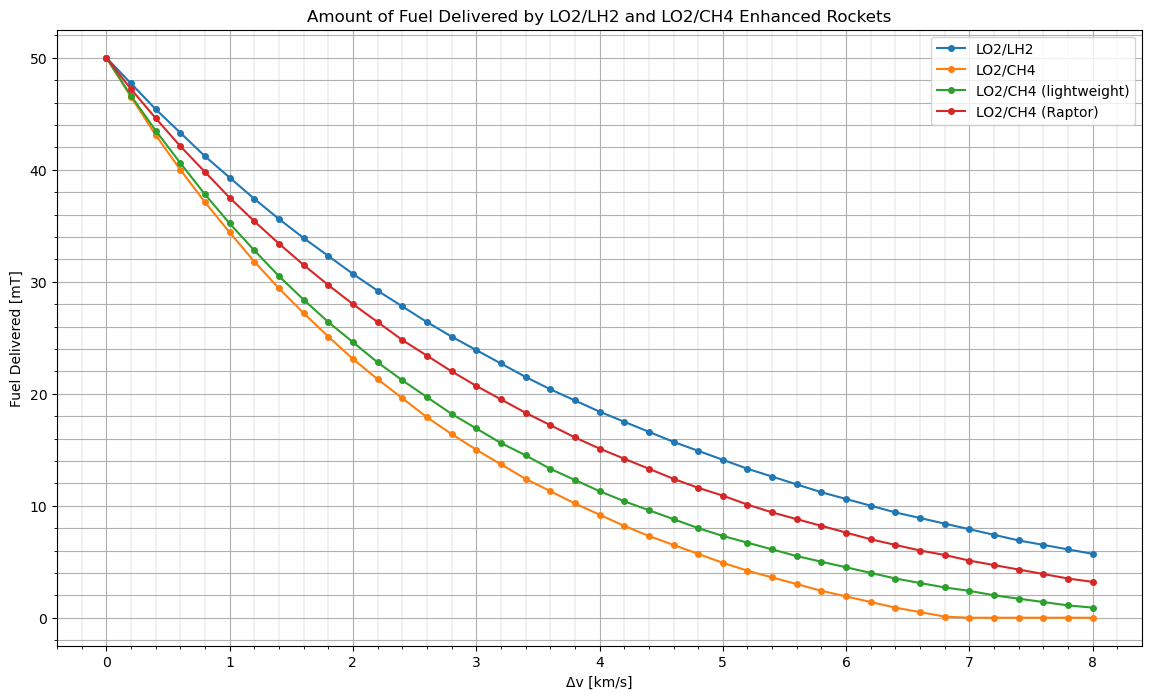

In [11]:
df2 = pd.read_excel('SpaceTransport2.xlsx')
all_fuel = []
for Δv in range(0,8001,100):
    fuel_delivered =  round((df2['Dry Mass [mT]'] + df2['Max Prop. Mass [mT]']
                       )/e**(Δv / g / df2['Isp [s]']) - df2['Dry Mass [mT]'], 1)
    all_fuel.append([Δv/1000] + list(fuel_delivered))

df3 = pd.DataFrame(all_fuel, columns = ['Δv [km/s]'] + list(df2['Rocket Engine']))
df3[df3 < 0] = 0
ax = df3.iloc[::2].plot.line(x="Δv [km/s]", y=["LO2/LH2","LO2/CH4","LO2/CH4 (lightweight)","LO2/CH4 (Raptor)"], grid=True,  marker='.', figsize=(14,8), markersize=8, 
                   title='Amount of Fuel Delivered by LO2/LH2 and LO2/CH4 Enhanced Rockets')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('Fuel Delivered [mT]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

Ok, now it looks much better.  It is good to see, that Mr. Musk didn't made a fatal mistake, the LO2/CH4 (Raptor) now it's much closer to the LO2/LH2, so nothing stops humanyity from colonizing Mars :-)

Now time to get back to our original problem.

**c) 2. Are some space tankers not suitable for certain values of Delta-V?**


Certainly when a tanker arrives with no fuel to be delivered or doesn't arrive at all, then that tanker is not suitable for the job.  Let's put back the original Fuel Delivered in function of Δv chart:

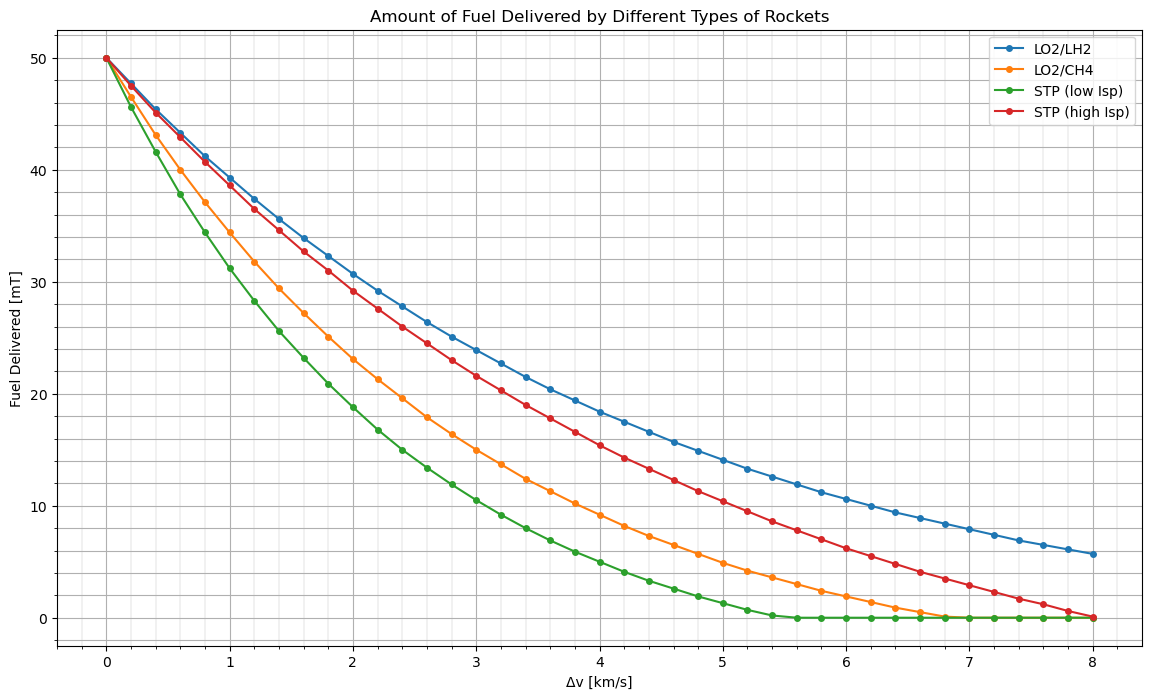

In [12]:
ax = df1.iloc[::2].plot.line(x="Δv [km/s]", y=["LO2/LH2","LO2/CH4", "STP (low Isp)", "STP (high Isp)"], grid=True,  marker='.', figsize=(14,8), markersize=8, 
                   title='Amount of Fuel Delivered by Different Types of Rockets')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('Fuel Delivered [mT]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

At Δv 8 km/s only the LO2/LH2 rocket is delivering something.  It is only slightly more than 10% left of the original amount of fuel.  I'm not sure if based on this we can have a very lucrative business, but who knows?  Maybe at the origin there is a sale, so we might be able to buy very cheap the LO2 and the LH2 :-)

If we suppose that our business is working when we deliver let's say 8 mT out of the 50 mT then LO2/LH2 is good up to Δv of 7 km/s, the STP (high Isp) is good to go up to Δv of 5.6 km/s, LO2/CH4 is ok up to Δv = 4 km/s and STP (low Isp) is suitable for Δv up to 3.4 km/s

However, the Δv efficiency is one single parameter, when we are putting together our business we should consider all the other circumstances as well.

**A Funny Thought Experiment**

I was playing with the idea of what would happen if we had a highway from Earth to EML1 with Earth-like conditions.  How much fuel could be delivered by a tanker truck?

<center><img src="img/Highway_to_the_Moon.png" style="width: 360px; height: 360px;"></center>

I've quickly looked up on the net that a big truck can deliver 30,000 liters of fuel and a typical consumption would be 30 liter/100 km.  Considering a distance of 300,000 km from Earth to EML1 we can quickly find out that our truck would consume 90,000 liter fuel - and we were very generous, because the 30 liter/ 100 km consumption is not taking into account that we are carrying another 90,000 liter surplus for our own consumption.  Considering an average speed of 100 km/h it would take 125 days to arrive to EML1 - driving day and night without stopping on the way.

Takeaway: While on Earth we are quite happy with the ratio of the payload vs the consumed fuel, if we try to extrapolate our way of transport up to EML1 we are going to fail miserably.

What if our truck doesn't go up to EML1 "only" to GEO?  After all we have this concept of [space elevator](https://en.wikipedia.org/wiki/Space_elevator).  


<center><img src="img/SpaceElevator.png" style="width: 555px; height: 298px;"></center>

Good news :-)  Our truck would consume "only" 10,800 liters of fuel on those 36,000 kilometers up to GEO (considering energy needs for Earth-like horizontal travelling) and the trip would take 15 days.  In "reality" our truck can climb maximum slope of 10% but after a few thousand kilometers it would be much more easy - e.g. at double of Earth radius the gravitational force is only 1/4 of the standard 9.81 m/s<sup>2</sup>.

Even better news: While we don't have materials strong enough to build a space elevator on Earth, our materials are good enough to build [extra-terrestrial elevator](https://en.wikipedia.org/wiki/Space_elevator#Extraterrestrial_elevators) on Mars or on Moon.  We could build them from materials locally available - so we have here a double business case :-)

### d) Table 2 lists the Delta-V from potential resource locations to EML1. Compare these Delta-Vs to the results in part c.
#### Discuss the suitability of using each of the four space tankers to ship propellant from the locations in Table 2. Consider the potential resources known to exist in these locations.


**Table 2**: Delta-V from potential resource locations to EML1

| Potential Resource Locations        | Delta-v [km/s] |
|------------------------------       |:--------------:|
| Near Earth Object-NEO (low Delta-v) | 1.0            |
| Lunar Surface                       | 2.5            |
| Near Earth Object-NEO (high Delta-v | 3.0            |
| Low Earth Orbit (LEO)               | 3.8            |
| Mars Surface                        | 7.5            |

**Near Earth Object-NEO (low Delta-v) - EML1 - 1 km/s**


The delivered fuel after Δv 1 km/s for every type of spaceship:

In [13]:
df1.set_index('Δv [km/s]', inplace=True)
df1[df1.index.isin([1])]

,LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
Δv [km/s],,,,
1.0,39.3,34.4,31.2,38.6


The spaceships are more or less ok for this "small" Δv=1 km/s.  They are going to deliver between ~30 and ~40 mT of fuel, so let's go to examine what we can be findd on NEO.  

NEO-s are asteroids with an orbit relatively close to earth, there have been discovered ~25k such asteroids and their cumulative mass is estimated on the magnitude of 1E16 kg.  The asteroids are classified in 3 major types:
* **S-complex** - made of Silicate minerals, Metallic Fe/Ni, Sulfide minerals, very dry, max 1% water. Resources: regolith - Oxygen can be extracted
* **C-complex** - made of Hydrated silicates (clays), Anhydrous silicates, Sulfide minerals, Carbon-rich material. Resources: Water (must be heated to >400℃), Carbon, Bulk silicate material.
* **M-type** - made of Iron nickel metal, Anhydrous silicates.  Resources: Base metals (Fe, Ni, Co), pretious metals.

From S-complex asteroid regolith we could extract oxygen. It is unlikely to find here hydrogen and carbon, therefore this mission is recommended only for the STP spaceships. <br>
**Note**<br>
Meanwhile I've got some more info about these STP spaceships.  It looks like theoretically they can reach Isp ~1000 with hydrogen, Isp ~600 with helium and with the next gases from the periodic table (nitrogen and oxygen) the Isp will be slightly over 200.  In the problem description we consider every gas equal, but it should be noted that in this scenario only STP (low ISP) is in correlation with reality.

The C-complex can provide us water and carbon. By splitting the water, we can produce LO2 and LH2 and we can produce methane as well since we have carbon. All rockets are eligible to engage in this transport business, but the LO2/LH2 and the STP (high Isp) are going to yield better returns.

The M-type asteroids are not recommended for fuel business. They might contain gases trapped in some minerals, but this is not why they are famous. Better if we leave those asteroids for the gold-diggers :-)


**Lunar Surface - EML1 - 2.5 km/s**

##### The delivered fuel after Δv 2.5 km/s for every type of spaceship:

In [14]:
df1[df1.index.isin([ 2.5])]

,LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
Δv [km/s],,,,
2.5,27.1,18.7,14.2,25.2


The Moon is much bigger then an asteroid, here we can find most of the materials from all the asteroid types, depending where are we going to set up a base. If we want to do propellant business then better go to the South Pole, there we can find ice and we can produce hydrogen and oxygen by splitting the water.  Unfortunately the carbon is pretty scarce on the Moon, so unless we are discovering by chance some good deposits of carbon I'd say that we use the LO2/LH2 and the STP (high Isp) spaceships for our transport business.

As mentioned before, we can't decide our business just on one single parameter - like the amount of fuel transported.  Let's have a look on some other factors as well.  

**NEO-Asteroids or Moon? - this is the question**

The NEO low delta-v asteroids need "only" 1 km/s Δv vs the Moon Δv of 2.5 km/s, so it seems logical to go after the places with lower Δv.  Unfortunately we have some logistical challegnes with the asteroids:
* we have to detect them - this might be difficult - especially the water rich asteroids are darker and harder to detect them
* we have to wait for orbits to line up 
* long travel times 
* mining the asteroid - can be challenging because of the micro-gravity environment

Here is a table comparing the Moon and NEO-asteroids:


| Moon                                              |                   NEO-Asteroids            |
|---------------------------------------------------|--------------------------------------------|
| 3 days away, maybe 1 week if taking DRO route     | Hundreds of days away, up to years for orbits to line up |
| Water as ice deposits                             | Water locked in clays at ~9% concentration, to be heated to >400℃ |
| Stable surface, useful gravity                    | Rubble piles weakly held together, microgravity |
| Moon-base, infrastructure build-up                | One-ship mining and transporting business |

Now we have a better view of the Moon vs NEO-Asteroids, so let's revisit our Δv table - including this time the NEO-asteroids with high delta-v of 3 km/s


In [15]:
df1[df1.index.isin([1, 2.5, 3])]

,LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
Δv [km/s],,,,
1.0,39.3,34.4,31.2,38.6
2.5,27.1,18.7,14.2,25.2
3.0,23.9,15.0,10.5,21.6


Considering the previous reasoning it is better to stay on the Moon whenever possible.  I think that the LO2/LH2 and the STP (high Isp) spaceships should be kept for doing business on Moon.  If we find carbon on the Moon then the LO2/CH4 rocket can join the party, otherwise it can try it's luck on a C-Type NEO-asteroid.

**Low Earth Orbit LEO - EML1 - 3.8 km/s**

The delivered fuel after Δv 3.8 km/s for every type of spaceship:

In [16]:
df1[df1.index.isin([ 3.8])]

,LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
Δv [km/s],,,,
3.8,19.4,10.2,5.9,16.6


It is interesting that we call LEO as a potential resource location.  Certainly, we can have transports from Earth to LEO for a delta-v of about 9.4 km/s, but that won't be an efficient resource.  However, if we try to start up a space industry this is our only option to get stuff from Earth to LEO and then from LEO to further destinations.

Currently the upcoming Starship will be capable for delivering enough fuel to fill our transporters.  Considering the data on [Starship Wikipedia](https://en.wikipedia.org/wiki/SpaceX_Starship) page, the first stage is going to use 3400 mT fuel and the second stage 1200 mT fuel to transfer a payload of 100 mT to LEO (500 km).  The good news is that this payload can be any type of fuel, so we can serve all type of transporters.  However, it is heartbreaking to see those numbers.  Two LO2/CH4 transporters are going to deliver only ~20 mT from LEO to EML1 out of the initial 100 mT, but if we consider the full cycle of Earth-LEO-EML1 things look even darker.  Out of the initial 3400 mT + 1200 mT + 100 mT we end up with only 20 mT at EML1.  That is only 0.4% of the initial amount.  The LO2/LH2 transporter performs better, it can deliver ~20 mT each, but we are still at only 0.8% efficiency.  

It would be nice if we wouldn't have to go down to the surface of the Earth to get those resources.  Since the STP can use any type of gas, they just could lower the orbit, collect, compress and liquify the air to get a full tank.  Even the LO2/LH2 and the LO2/CH4 spaceships could do the same for the LO2 part - which is about 75..80% of the total mass of propellant.  I guess I'm not the first one to think about this scenario, and I guess it hasn't been done, because it is not possible :-(


**Thought Experiment**

Let's try to imagine how can an STP collect propellant.  Let's suppose the STP is on an elliptic orbit.  The perigee is close to the Karman line.  The orbital period is ~3 hours, the time spent close to the Karman line is ~20 minutes.  During these 20 minutes the spaceship is collecting about 1 mT of air.  Now we have to be very careful, not to heat up too much our spaceship - this is our first problem to solve.  The next problem is that we are going to slow down because we have to accelerate that 1mT air to our perigee speed - let's suppose 8 km/s.  So we are going to lose and impulse of 8\*10<sup>6</sup> kg$\frac{m}{s}$. We can recover the lost momentum by accelerating our spaceship back to the required speed.  The STP (high Isp) has a specific impulse of 500 which means that the propellant exhaust speed v<sub>e</sub>=5 km/s, and this isn't enough unfortunately.  Consuming all the collected air would give us only 5\*10<sup>6</sup> kg$\frac{m}{s}$.  We would need 1.6 mT propellant to get back to the original speed, or we would need and Isp over 800, but better to have Isp over 1,000 to not be forced to spend all the air we just collected.


**Thought Experiment 2 - EML1 to LEO**

Let's check the other direction - from EML1 to LEO.  Let's suppose we have a flourishing space industry, we have abundant fuel production in Cis-Lunar space, and we have a potential customer on LEO - a Starship with 100 colonists that are heading to the Mars, but they need a refuel, they need 1200 mT of LO2/CH4.  

Current plans are that after arriving to LEO the colonist's Starship will get refueled by additional 7..10 tanker Starships.  This might take a while, and our Δv of 3.8 km/s from EML1 is much more effective than the Δv of 9.4 km/s from the surface of the Earth. Mr. Musk is open to negotiations and wants to hear our offer.  And this is when we discover that our LO2/CH4 transporter can deliver "only" 10 mT propellant from EML1 and that means that 120 tours are necessary to refill the Starship :-(


**Mars Surface - EML1 - 7.5 km/s**

The delivered fuel after Δv 7.5 km/s for every type of spaceship:

In [17]:
df1[df1.index.isin([ 7.5])]

,LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
Δv [km/s],,,,
7.5,6.7,0.0,0.0,1.4


Practically only the LO2/LH2 spaceship can deliver 6.7 mT and the STP (high Isp) can deliver only a symbolic amount of 1.4 mT.  So, it is not very wise to set up a fuel delivery business from Mars.  Especially if we consider that we get this "low" Δv only every 2 years, and the transfer takes half a year.  

There is one interesting thing though.  In our previous thought experiment when the STP tanker tried to collect propellant from the Earths atmosphere we failed because our perigee speed of 8 km/s was much higher than the propellant exhaust speed of 5 km/s.  In case of Mars, we have several good news: 
- the perigee speed on Mars can be as low as 3.3 km/s, so we don't have to spend all the CO<sub>2</sub> collected from the Martian atmosphere to maintain our orbital speed.
- CO<sub>2</sub> can be liquified at higher temperatures (between -57℃ to 31℃) at a pressure of 5.1 atmosphere
- we don't need to descend to the surface of the Mars so instead of Δv=7.5 km/s we need to spend only Δv=3.5 km/s on the Mars - EML1 transit.

There is one drawback though - the sunshine power density at Mars is only 40% of the power density near the Earth and our STP is using the sunshine to heat up the gases.


## Houston, we have a problem!

Now while I was imersed in Thought Experiment 2 (when we were delivering propellant to the Starship "parked" on LEO) it hit me hard that if our tanker is delivering all the propellant then it can't return to EML1.

And then I realised that actually all my analizis is wrong.  We were considering all the time the transport from the source to EML1 and never crossed in our minds, that if we want a flourishing mining business then our tanker has to get back somehow to the source to provide a new delivery.  We could simply double the $\Delta v$ in our requirements, but traveling twice the distance and dumping the excess fuel is not the same with going to EML1 and making a partial delivery and keeping enough fuel to return back to the source.


The formula for the mass of the delivered propellant is defined by equation $\eqref{eq:prop_eq}$

\begin{equation*}
m_{prop.deliv} = (m_{dry} + m_{max.prop})  ·  e^{-\frac{\Delta v}{gI_{sp}}} - m_{dry} 
\label{eq:vector_ray} \tag{2}
\end{equation*}





When arriving at EML1 now we will do only a partial delivery, keeping enough propellant for return. The mass of the propellant what we called before $m_{prop.deliv}$ will be split to $m_{part.deliv} + m_{return}$ so our equation will become:



\begin{equation*}
m_{part.deliv} = (m_{dry} + m_{max.prop})  ·  e^{-\frac{\Delta v}{gI_{sp}}} - m_{dry} - m_{return}
\label{eq:prop1_eq} \tag{3}
\end{equation*}


Now the $m_{return}$ is $\Delta v$ dependent, and we are going to get it from equation $\eqref{eq:prop_eq}$ by considering $m_{prop.deliv} = 0$ (when we are coming back to the source we want to arrive with empty tank) and $m_{max.prop} = m_{return}$ (when we start our return trip from EML1 we will have exactly $m_{return}$ propellant.

$$
m_{prop.deliv} = 0 = (m_{dry} + m_{return})  ·  e^{-\frac{\Delta v}{gI_{sp}}} - m_{dry} 
$$




$$
-m_{return} ·  e^{-\frac{\Delta v}{gI_{sp}}}  = m_{dry}· e^{-\frac{\Delta v}{gI_{sp}}}  - m_{dry} 
$$


$$
m_{return} ·  e^{-\frac{\Delta v}{gI_{sp}}} = m_{dry} · \left(1 - e^{-\frac{\Delta v}{gI_{sp}}} \right)
$$

$$
m_{return} = m_{dry} · \left(1 - e^{-\frac{\Delta v}{gI_{sp}}} \right) ·  e^{\frac{\Delta v}{gI_{sp}}}
$$

\begin{equation*}
m_{return} = m_{dry} · \left(e^{\frac{\Delta v}{gI_{sp}}} - 1 \right)
\label{eq:m_return_eq} \tag{4}
\end{equation*}


Putting back equation $\eqref{eq:m_return_eq}$ to equation $\eqref{eq:prop1_eq}$

\begin{equation*}
m_{part.deliv} = (m_{dry} + m_{max.prop})  ·  e^{-\frac{\Delta v}{gI_{sp}}} - m_{dry} - m_{dry} · \left(e^{\frac{\Delta v}{gI_{sp}}} - 1 \right)
\end{equation*}


\begin{equation*}
m_{part.deliv} = m_{dry}·e^{-\frac{\Delta v}{gI_{sp}}} + m_{max.prop}·e^{-\frac{\Delta v}{gI_{sp}}} - m_{dry} · e^{\frac{\Delta v}{gI_{sp}}}
\end{equation*}


\begin{equation*}
m_{part.deliv} = m_{dry}· \left(e^{-\frac{\Delta v}{gI_{sp}}} -  e^{\frac{\Delta v}{gI_{sp}}} \right)  + m_{max.prop}·e^{-\frac{\Delta v}{gI_{sp}}} 
\label{eq:partial_deliv_eq} \tag{5}
\end{equation*}


Now we have the this new equation with partial delivery, let's revisit some of the older questions:

### b.Return) How much propellant can be delivered by each space tanker for a Delta-V of 2 km/s?
##### Assume the tanker is fully fueled at the start of the 2 km/s Delta-V maneuver, when arriving to EML1 performs a partial delivery - keeping enough fuel to get back to the start

Now let's suppose we have a lazy captain who doesn't like to do math, therefore he takes the easy way and simply multiplies the $\Delta v$ by 2 and delivers the remaining amount.

In [18]:
Δv = 4000 # [m/s]
df['Lazy Deliv [mT]'] = round((df['Dry Mass [mT]'] + df['Max Prop. Mass [mT]']
                       ) * e**(-Δv / g / df['Isp [s]']) - df['Dry Mass [mT]'], 1)
df

,Rocket Engine,Isp [s],Dry Mass [mT],Max Prop. Mass [mT],Max Δv [km/s],Prop Deliv [mT],Lazy Deliv [mT]
0,LO2/LH2,450,3,50,12.7,30.7,18.4
1,LO2/CH4,312,6,50,6.8,23.1,9.2
2,STP (low Isp),250,6,50,5.5,18.8,5.0
3,STP (high Isp),500,12,50,8.1,29.2,15.4


Now here comes Hans Solo, he doesn't like math either, but he has connections all around the world, amongst others at the Jedi Institute in Luxembourg - who are using formula $\eqref{eq:partial_deliv_eq}$, so Hans Solo is getting the best numbers for the partial delivery enabling the return:

In [19]:
Δv = 2000 # [m/s]
df['Part Deliv [mT]'] = round(df['Dry Mass [mT]']*( e**(-Δv / g / df['Isp [s]']) - 
                        e**(Δv / g / df['Isp [s]']) ) + df['Max Prop. Mass [mT]'] * e**(-Δv / g / df['Isp [s]']) , 1)
df

,Rocket Engine,Isp [s],Dry Mass [mT],Max Prop. Mass [mT],Max Δv [km/s],Prop Deliv [mT],Lazy Deliv [mT],Part Deliv [mT]
0,LO2/LH2,450,3,50,12.7,30.7,18.4,29.0
1,LO2/CH4,312,6,50,6.8,23.1,9.2,17.6
2,STP (low Isp),250,6,50,5.5,18.8,5.0,11.2
3,STP (high Isp),500,12,50,8.1,29.2,15.4,23.2


Good choice Hans Solo!  Listening to the good advice now he can deliver significantly more fuel than the Lazy Captain.

### c.Return) Solve for the propellant delivered enabling the return by each space tanker for Delta-Vs from 1 km/s to 8 km/s in increments of ≤1 km/s (i.e. 1, 2, 3 km/s, etc... or finer). Present the result in a table or a graph.
#### Answer these specific questions:
1. Are some space tankers clearly superior?
2. Are some space tankers not suitable for certain values of Delta-V?

In [20]:
all_fuel = []
for Δv in range(0,8001,100):
    fuel_delivered =  round(df['Dry Mass [mT]']*( e**(-Δv / g / df['Isp [s]']) - 
                        e**(Δv / g / df['Isp [s]']) ) + df['Max Prop. Mass [mT]'] * e**(-Δv / g / df['Isp [s]']) , 1)
    all_fuel.append([Δv/1000] + list(fuel_delivered))

df1 = pd.DataFrame(all_fuel, columns = ['Δv [km/s]'] + list(df['Rocket Engine']))


Here is our new table when we allow the transporters to return from EML1 to the source:

In [34]:
df1[df1 < 0] = 0
df1

,Δv [km/s],LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
0,0.0,50.0,50.0,50.0,50.0
1,0.1,48.7,48.0,47.5,48.5
2,0.2,47.5,46.1,45.1,47.0
3,0.3,46.3,44.2,42.8,45.6
4,0.4,45.1,42.3,40.5,44.1
...,...,...,...,...,...
76,7.6,0.0,0.0,0.0,0.0
77,7.7,0.0,0.0,0.0,0.0
78,7.8,0.0,0.0,0.0,0.0
79,7.9,0.0,0.0,0.0,0.0


Now let's try to plot this new table:

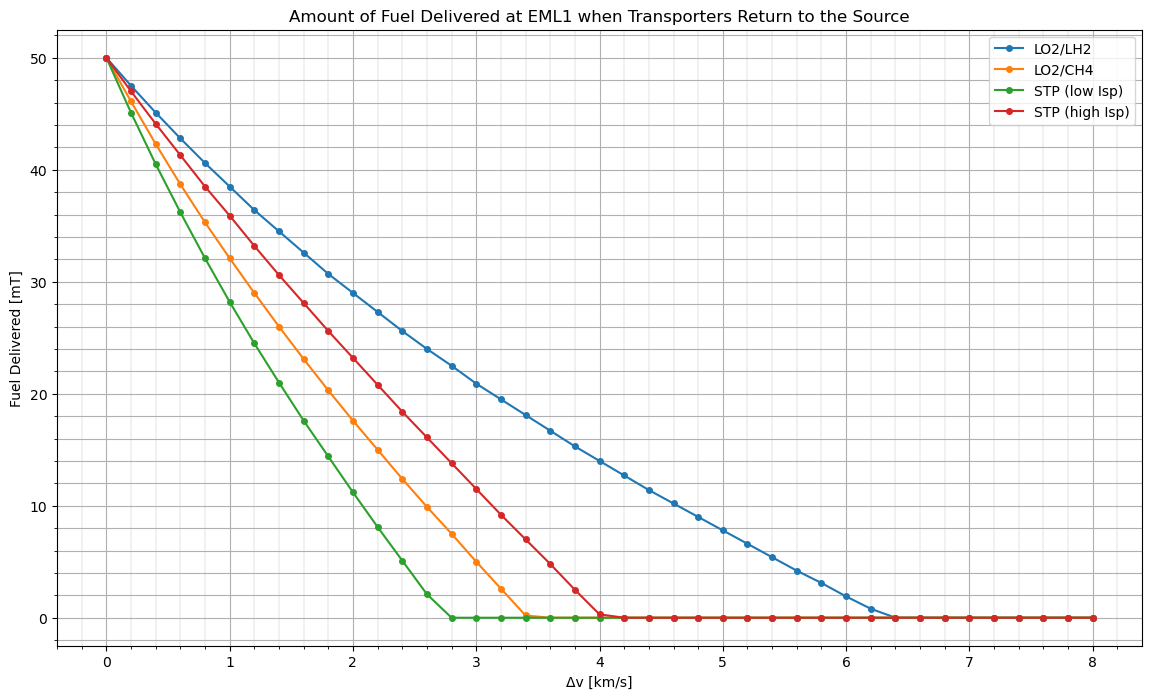

In [38]:
ax = df1.iloc[::2].plot.line(x="Δv [km/s]", y=["LO2/LH2","LO2/CH4", "STP (low Isp)", "STP (high Isp)"], grid=True,  marker='.', figsize=(14,8), markersize=8, 
                   title='Amount of Fuel Delivered at EML1 when Transporters Return to the Source')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('Fuel Delivered [mT]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

...and here goes our space fuel transport business into the ground :-(

It looks like our business opportunities have been reduced quite significantly.

### d.Return) Table 2 lists the Delta-V from potential resource locations to EML1. Compare these Delta-Vs to the results in part c.
#### Discuss the suitability of using each of the four space tankers to ship propellant from the locations in Table 2. Consider the potential resources known to exist in these locations.


**Table 2**: Delta-V from potential resource locations to EML1

| Potential Resource Locations        | Delta-v [km/s] |
|------------------------------       |:--------------:|
| Near Earth Object-NEO (low Delta-v) | 1.0            |
| Lunar Surface                       | 2.5            |
| Near Earth Object-NEO (high Delta-v | 3.0            |
| Low Earth Orbit (LEO)               | 3.8            |
| Mars Surface                        | 7.5            |

Answering this question become much simpler.  Let's put all the NEO-Asteroids and the Lunar surface in one single table:

**NEO (low Δv=1 km/s) / Moon Δv=2.5 km/s / NEO (high Δv=3 km/s) -> EML1**

In [21]:
df1.set_index('Δv [km/s]', inplace=True)
df1[df1.index.isin([1,2.5,3])]

,LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
Δv [km/s],,,,
1.0,38.5,32.1,28.2,35.9
2.5,24.8,11.2,3.6,17.3
3.0,20.9,5.0,-3.9,11.5


Now things didn't changed significantly from previous case.  When going for water we're still better on the Moon because of the Moonbase and shorter time to access.  On the C-type asteroids the LO2/CH4 transporter might find water and carbon, but it can go only for the asteroids in the low Δv region.  Crosschecking with reality only the LO2/LH2 starship has a business case from the Moon to EML1, but that one isn't a very lucrative one, since on that small distance it is going to lose half of the fuel.

**LEO - EML1 - Δv=3.8 km/s**

In [22]:
df1[df1.index.isin([3.8])]

,LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
Δv [km/s],,,,
3.8,15.3,-4.6,-16.4,2.5


This answer is shorter: when the transporter has to go back to the source after the delivery then on the LEO - EML1 route only the LO2/LH2 rocket can do business.

**Mars - EML1 - Δv=7.5 km/s**

In [23]:
df1[df1.index.isin([7.5])]

,LO2/LH2,LO2/CH4,STP (low Isp),STP (high Isp)
Δv [km/s],,,,
7.5,-6.7,-64.7,-125.1,-41.9


None of our transporters is qualified to carry fuel from Mars to EML1. 